In [1]:
#Imports for data handling and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("Speed Dating Data.csv",encoding = 'ISO-8859-1')

In [3]:
#The speed dating experiment was set up in waves looking at the key document
#We will focus on wave_1, the same can then be applied to the other waves

df = df.loc[df["wave"]==1,:]
df.shape

(200, 195)

In [4]:
#Let's check how many values are missing in the dataset, and drop the columns that are either empty or don't carry information

for c in df.columns:
    nc = df[c].isnull().sum()
    print('Null count in column {} is {}'.format(c,nc))
    if nc == 200:
        df = df.drop(c,axis=1)

df.shape

Null count in column iid is 0
Null count in column id is 0
Null count in column gender is 0
Null count in column idg is 0
Null count in column condtn is 0
Null count in column wave is 0
Null count in column round is 0
Null count in column position is 0
Null count in column positin1 is 200
Null count in column order is 0
Null count in column partner is 0
Null count in column pid is 0
Null count in column match is 0
Null count in column int_corr is 0
Null count in column samerace is 0
Null count in column age_o is 0
Null count in column race_o is 0
Null count in column pf_o_att is 0
Null count in column pf_o_sin is 0
Null count in column pf_o_int is 0
Null count in column pf_o_fun is 0
Null count in column pf_o_amb is 0
Null count in column pf_o_sha is 0
Null count in column dec_o is 0
Null count in column attr_o is 1
Null count in column sinc_o is 0
Null count in column intel_o is 0
Null count in column fun_o is 0
Null count in column amb_o is 2
Null count in column shar_o is 10
Null co

(200, 121)

In [5]:
#Let's see the remaining columns 
for c in df.columns:
    print(c)

iid
id
gender
idg
condtn
wave
round
position
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
satis_2
length
numdat_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr3_2
sinc3_2
intel3_2
fun3_2
amb3_2
you_call
them_cal
date_3
attr1_3
sinc1_3
intel1_3
fun1_3
amb1_3
shar1_3
attr3_3
sinc3_3
intel3_3
fun3_3
amb3_3


C:\Users\Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

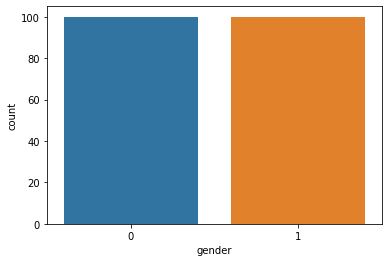

In [6]:
#Let's visualize the gender and ages distributions in this wave

sns.countplot(df["gender"])

C:\Users\Mohamed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

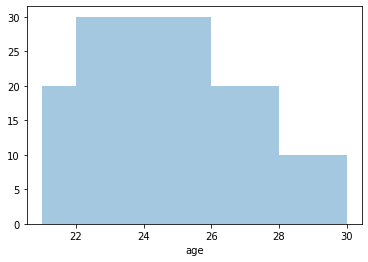

In [7]:
#We have an equal distribution of males and females in this wave
sns.distplot(df["age"],kde=False)

Text(0.5, 1.0, 'Shared interest attribute distribution for males')

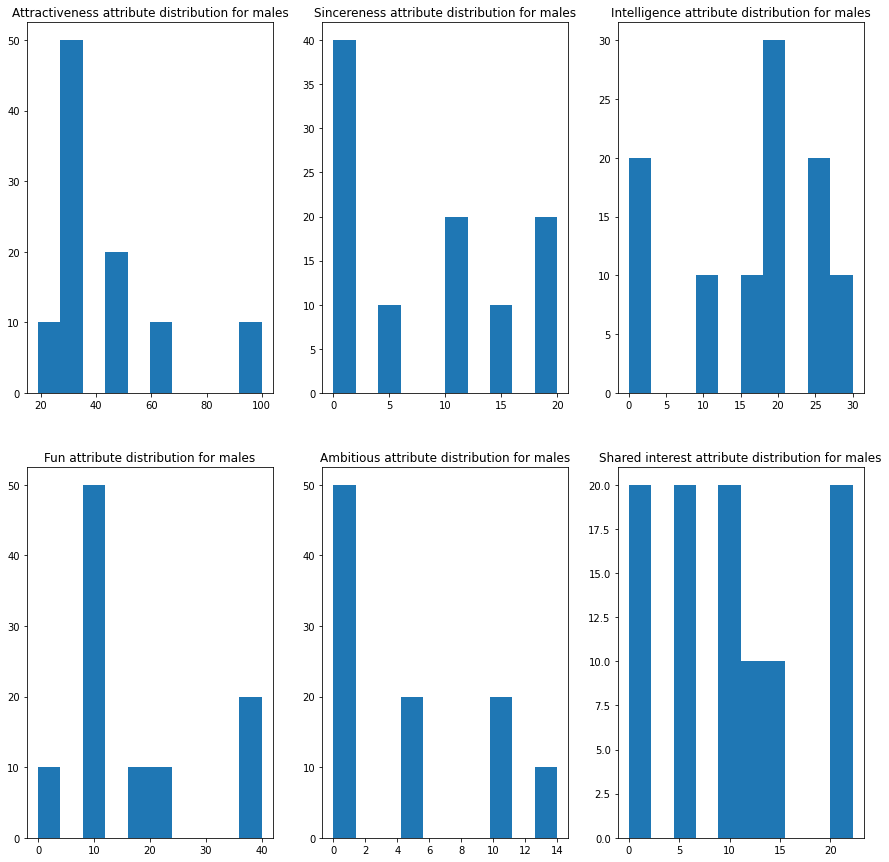

In [8]:
#Everyone is between 20 and 30 years old, a young wave
#Let's look at what attributes are most important for the opposite gender
#First let's look at what males look for

df_pf_m = df.loc[df["gender"]==0,["pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]]

plt.figure(figsize=(15,15))
plt.subplot(231)
plt.hist(df_pf_m["pf_o_att"])
plt.title("Attractiveness attribute distribution for males")
plt.subplot(232)
plt.hist(df_pf_m["pf_o_sin"])
plt.title("Sincereness attribute distribution for males")
plt.subplot(233)
plt.hist(df_pf_m["pf_o_int"])
plt.title("Intelligence attribute distribution for males")
plt.subplot(234)
plt.hist(df_pf_m["pf_o_fun"])
plt.title("Fun attribute distribution for males")
plt.subplot(235)
plt.hist(df_pf_m["pf_o_amb"])
plt.title("Ambitious attribute distribution for males")
plt.subplot(236)
plt.hist(df_pf_m["pf_o_sha"])
plt.title("Shared interest attribute distribution for males")

#Males look for attractive and intelligent partners


Text(0.5, 1.0, 'Shared interest attribute distribution for females')

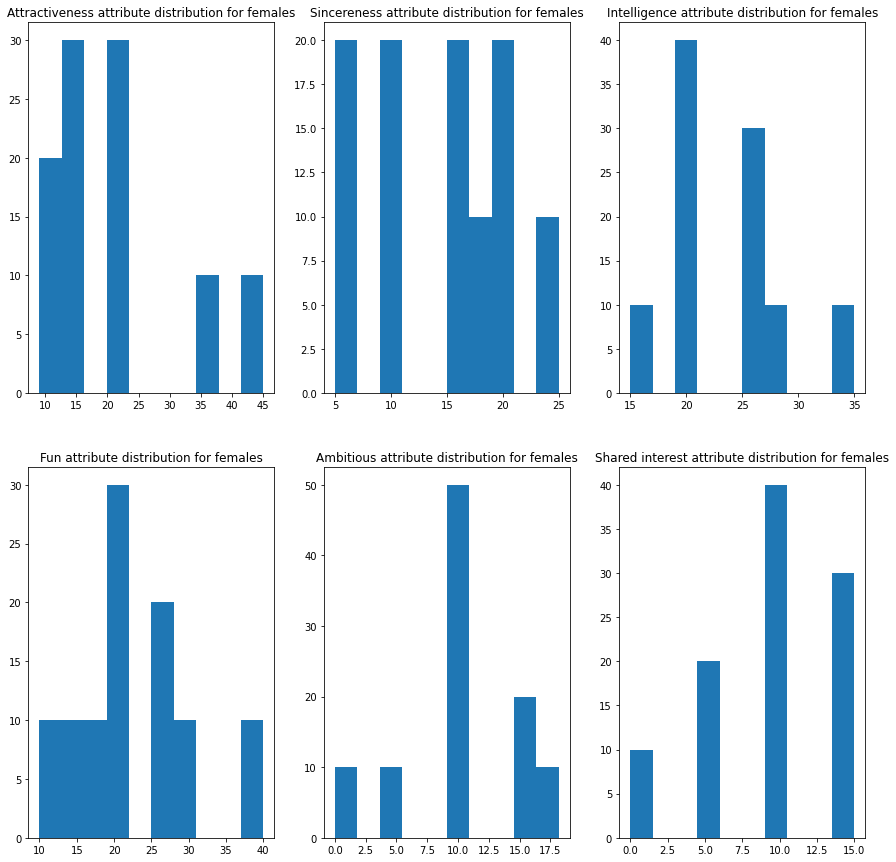

In [9]:
#Let's do the same analysis for females

df_pf_m = df.loc[df["gender"]==1,["pf_o_att","pf_o_sin","pf_o_int","pf_o_fun","pf_o_amb","pf_o_sha"]]

plt.figure(figsize=(15,15))
plt.subplot(231)
plt.hist(df_pf_m["pf_o_att"])
plt.title("Attractiveness attribute distribution for females")
plt.subplot(232)
plt.hist(df_pf_m["pf_o_sin"])
plt.title("Sincereness attribute distribution for females")
plt.subplot(233)
plt.hist(df_pf_m["pf_o_int"])
plt.title("Intelligence attribute distribution for females")
plt.subplot(234)
plt.hist(df_pf_m["pf_o_fun"])
plt.title("Fun attribute distribution for females")
plt.subplot(235)
plt.hist(df_pf_m["pf_o_amb"])
plt.title("Ambitious attribute distribution for females")
plt.subplot(236)
plt.hist(df_pf_m["pf_o_sha"])
plt.title("Shared interest attribute distribution for females")

#Females look for males with a bit of everything

In [10]:
df = df.sort_values(by="age",ignore_index=True)
df["age"].unique()

array([21., 22., 23., 24., 25., 26., 27., 28., 30.])

In [11]:
#Let's now look at where in the age range of this wave the most positive answers have been

fig = go.Figure()

for i in df["age"].unique():

    df_au = df.loc[df["age"]==i,:]

    fig.add_trace(go.Histogram(x=df_au["dec_o"],visible=True))

fig.update_layout(title=go.layout.Title(text="Partner decision by age 1=yes and 0=no",x=0.5),showlegend=False)

fig.update_layout(updatemenus = [go.layout.Updatemenu(active=0,buttons=[
    go.layout.updatemenu.Button(
        label="21",method="update",args=[{"visible":[True,False,False,False,False,False,False,False,False]}]),
    go.layout.updatemenu.Button(
        label="22",method="update",args=[{"visible":[False,True,False,False,False,False,False,False,False]}]),
    go.layout.updatemenu.Button(
        label="23",method="update",args=[{"visible":[False,False,True,False,False,False,False,False,False]}]),
    go.layout.updatemenu.Button(
        label="24",method="update",args=[{"visible":[False,False,False,True,False,False,False,False,False]}]),
    go.layout.updatemenu.Button(
        label="25",method="update",args=[{"visible":[False,False,False,False,True,False,False,False,False]}]),
    go.layout.updatemenu.Button(
        label="26",method="update",args=[{"visible":[False,False,False,False,False,True,False,False,False]}]),
    go.layout.updatemenu.Button(
        label="27",method="update",args=[{"visible":[False,False,False,False,False,False,True,False,False]}]),
    go.layout.updatemenu.Button(
        label="28",method="update",args=[{"visible":[False,False,False,False,False,False,False,True,False]}]),
    go.layout.updatemenu.Button(
        label="30",method="update",args=[{"visible":[False,False,False,False,False,False,False,False,True]}]),
])])
    

In [12]:
#23 year olds said yes the most with 19 occurences